Описание данных
ads_data.csv – данные взаимодействий с рекламными объявлениями

date – дата
time – время
event – действие (просмотр/клик)
platform – платформа
ad_id – id объявления
client_union_id – id рекламного кабинета
campaign_union_id – id рекламной кампании
ad_cost_type – тип оплаты
ad_cost – цена
has_video – есть ли видео
target_audience_count – размер аудитории
ads_clients_data.csv – характеристики рекламных клиентов

date – дата
client_union_id – id рекламного кабинета
community_id – id сообщества
create_date – дата создания рекламного клиента

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
path_to_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-kazantseva-40/shared/homeworks/python_ds_miniprojects/6/ads_data.csv'

In [3]:
path_to_client = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-kazantseva-40/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv'

In [4]:
ads_data = pd.read_csv(path_to_data)

In [5]:
ads_clients = pd.read_csv(path_to_client)

In [6]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [7]:
ads_data.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
dtype: object

In [8]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [9]:
ads_data['time'] = pd.to_datetime(ads_data.time)

In [10]:
ads_data.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [11]:
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [12]:
ads_clients.shape

(122078, 4)

In [13]:
ads_clients['date'] = pd.to_datetime(ads_clients.date)

In [14]:
ads_clients['create_date'] = pd.to_datetime(ads_clients.create_date)

In [15]:
ads_clients.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [16]:
ads_clients.dtypes

date               datetime64[ns]
client_union_id             int64
community_id                int64
create_date        datetime64[ns]
dtype: object

In [17]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [18]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'date': 'count'})

,ad_id,event,date
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [19]:
ads_data.query('ad_id == "122031" and event == "click"')

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
717024,2019-04-05,2019-04-05 17:10:07,click,ios,122031,122031,122031,CPM,196.7,0,14815


In [20]:
pivot = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'date': 'count'}) \
    .pivot(index='ad_id', columns='event', values='date').reset_index() \
    .fillna(0)

pivot

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


In [21]:
pivot.click.mean().round()

113.0

In [22]:
pivot.view.mean().round()

923.0

In [23]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [24]:
pivot = pivot.query('view != "0"')

In [25]:
import numpy as np

pivot['log_view'] = np.log(pivot.view)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


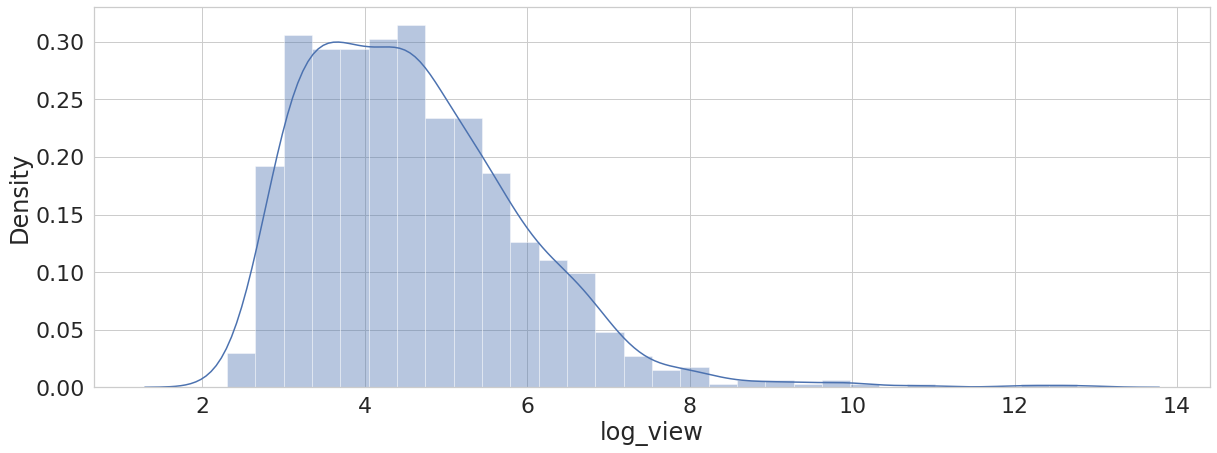

In [26]:
sns.distplot(pivot['log_view'])

In [27]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [28]:
new = ads_data.query('event == "view"')

In [29]:
new2 = new.groupby(['ad_id', 'date'], as_index=False) \
    .agg({'platform': 'count'})

In [30]:
new2

,ad_id,date,platform
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34
...,...,...,...
1926,122023,2019-04-05,15
1927,122031,2019-04-05,119
1928,122031,2019-04-06,19
1929,122078,2019-04-03,36


In [31]:
new3 = new2.groupby('date', as_index=False) \
    .agg({'platform': 'mean'})
new3

,date,platform
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [32]:
new3['roll'] = new3.platform.rolling(2).mean().round()

In [33]:
new3 = new3.dropna()
new3

,date,platform,roll
1,2019-04-02,137.786982,146.0
2,2019-04-03,163.952778,151.0
3,2019-04-04,675.901720,420.0
4,2019-04-05,919.109677,798.0
5,2019-04-06,277.122727,598.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


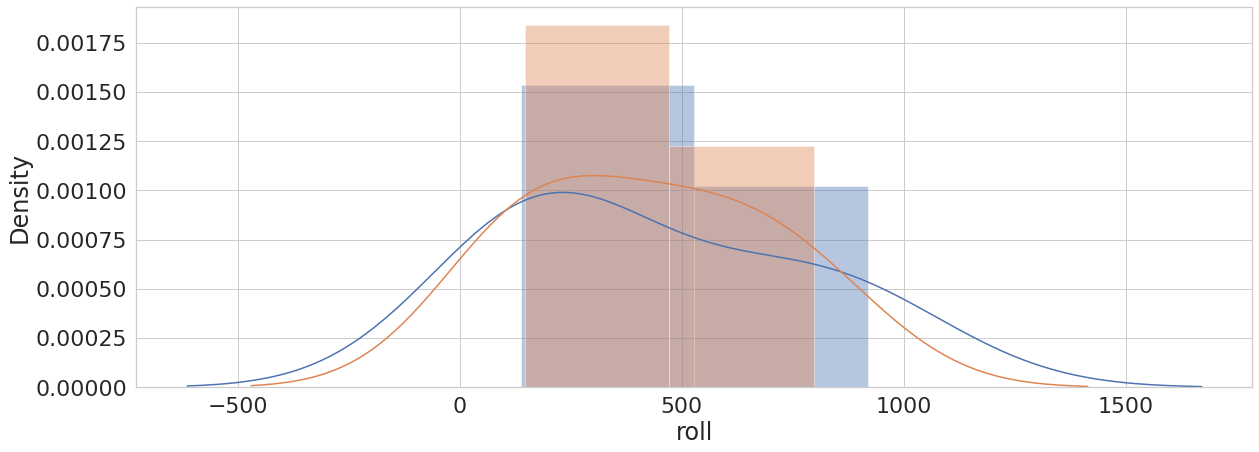

In [34]:
sns.distplot(new3.platform)
sns.distplot(new3.roll)

In [35]:
new3['abs'] = (new3.platform - new3.roll).abs()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
new3

,date,platform,roll,abs
1,2019-04-02,137.786982,146.0,8.213018
2,2019-04-03,163.952778,151.0,12.952778
3,2019-04-04,675.901720,420.0,255.901720
4,2019-04-05,919.109677,798.0,121.109677
5,2019-04-06,277.122727,598.0,320.877273


In [37]:
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [38]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [39]:
full = ads_data.merge(ads_clients, on="client_union_id")
full

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04


In [40]:
full['diff_time'] = full.date_x - full.create_date

In [41]:
full

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,diff_time
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days


In [42]:
full.dtypes

date_x                    datetime64[ns]
time                      datetime64[ns]
event                             object
platform                          object
ad_id                              int64
client_union_id                    int64
campaign_union_id                  int64
ad_cost_type                      object
ad_cost                          float64
has_video                          int64
target_audience_count              int64
date_y                    datetime64[ns]
community_id                       int64
create_date               datetime64[ns]
diff_time                timedelta64[ns]
dtype: object

In [43]:
new4 = full.groupby('client_union_id', as_index=False) \
    .agg({'diff_time': 'min'})
new4

,client_union_id,diff_time
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [44]:
new4.diff_time.mean()

Timedelta('124 days 09:04:43.532219570')

In [45]:
year = pd.Timedelta(365, unit='day')
year

Timedelta('365 days 00:00:00')

In [46]:
all_clients = ads_clients.client_union_id.nunique()
all_clients

122078

In [47]:
new_5 = new4.query('diff_time <= @year')

In [48]:
new_5

,client_union_id,diff_time
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [49]:
ads_client = new_5.client_union_id.nunique()

In [50]:
ads_client

838

In [51]:
per_cent = (ads_client / all_clients)*100

In [52]:
per_cent

0.6864463703533806

In [53]:
per_cent = round(per_cent, 2)

In [54]:
per_cent

0.69

In [55]:
new4.diff_time = pd.cut(new4.diff_time, pd.to_timedelta(['0d', '30d', '90d', '180d', '365d']))

In [56]:
new4

,client_union_id,diff_time
0,1,"(90 days 00:00:00, 180 days 00:00:00]"
1,9,"(90 days 00:00:00, 180 days 00:00:00]"
2,13,"(30 days 00:00:00, 90 days 00:00:00]"
3,16,"(90 days 00:00:00, 180 days 00:00:00]"
4,20,"(30 days 00:00:00, 90 days 00:00:00]"
...,...,...
833,122004,"(30 days 00:00:00, 90 days 00:00:00]"
834,122013,"(90 days 00:00:00, 180 days 00:00:00]"
835,122023,"(90 days 00:00:00, 180 days 00:00:00]"
836,122031,"(90 days 00:00:00, 180 days 00:00:00]"


In [57]:
new_end = new4.groupby('diff_time', as_index=False) \
    .agg({'client_union_id': 'count'})
new_end

,diff_time,client_union_id
0,"(0 days 00:00:00, 30 days 00:00:00]",11
1,"(30 days 00:00:00, 90 days 00:00:00]",263
2,"(90 days 00:00:00, 180 days 00:00:00]",396
3,"(180 days 00:00:00, 365 days 00:00:00]",168


In [59]:
import plotly.express as px
sns.set(
    font_scale=2, 
    style='whitegrid',
    rc={'figure.figsize':(20,7)}
)

In [65]:
a = px.bar(x=new_end.index, y=new_end.client_union_id)


In [66]:
a